# Web scraping and Exploratory Data Analysis with Python

Highest Ranked United Kingdom Companies by Forbes:
This list is based on the Forbes Global 2000, which ranks the world's 2,000 largest publicly traded companies. 
The Forbes list takes into account a multitude of factors, including the revenue, net profit, total assets and market value of each company; 
each factor is given a weighted rank in terms of importance when considering the overall ranking. 
The table below also lists the headquarters location and industry sector of each company. 

##### The figures are in billions of US dollars and are for the year 2021. The 50 highest ranked companies from the United Kingdom are listed.

In [ ]:
##########################################################################

In [ ]:
# codes together

import pandas as pd
from bs4 import BeautifulSoup
import requests



#Importing libraries and setting url, page, soup
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_Kingdom'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')


table = soup.find_all('table')[2]
print(table)

# getting the headers/columns
 # using list comprehension to extract the titles(headers) by looping through
companies_titles = table.find_all('th')
companies_table_titles = [title.text.strip() for title in companies_titles]
print(companies_table_titles)

# making a dataframe with the headers
df = pd.DataFrame(columns= companies_table_titles)
df

table_data = table.find_all('tr')
print(table_data)

for row in table_data[1:]:
    row_table_data = row.find_all('td')
    each_row_data = [data.text.strip() for data in row_table_data]
    length = len(df)
    df.loc[length] = each_row_data

df
df.to_csv(r'C:\Users\USER-PC\OneDrive\Data Analytics\Web scraping\Forbes ranked UK companies\Top50_Uk_companies_forbes_2021.csv')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Top50_Uk_companies_forbes_2021.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,0,1,16,Shell plc,London,261.76,20.27,404.38,211.10,Oil and Gas
1,1,2,38,HSBC,London,59.33,12.58,"2,957.94",135.30,Banking
2,2,3,50,BP,London,158.01,7.55,287.27,98.38,Oil and Gas
3,3,4,82,Rio Tinto,London,63.46,21.06,102.90,117.78,Mining
4,4,5,96,Lloyds Banking Group,London,58.48,7.36,"1,200.75",31.34,Banking


In [4]:
# Check the data types of the columns
df.dtypes

Unnamed: 0                 int64
Rank                       int64
Forbes 2000 rank           int64
Name                      object
Headquarters              object
Revenue(billions US$)    float64
Profit(billions US$)      object
Assets(billions US$)      object
Value(billions US$)      float64
Industry                  object
dtype: object

In [5]:
# Convert 'Profit(billions US$)' and 'Assets(billions US$)' to numeric
df['Profit(billions US$)'] = pd.to_numeric(df['Profit(billions US$)'], errors='coerce')
df['Assets(billions US$)'] = pd.to_numeric(df['Assets(billions US$)'], errors='coerce')

# Check the data types of the columns again
df.dtypes

Unnamed: 0                 int64
Rank                       int64
Forbes 2000 rank           int64
Name                      object
Headquarters              object
Revenue(billions US$)    float64
Profit(billions US$)     float64
Assets(billions US$)     float64
Value(billions US$)      float64
Industry                  object
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

Unnamed: 0               0
Rank                     0
Forbes 2000 rank         0
Name                     0
Headquarters             0
Revenue(billions US$)    0
Profit(billions US$)     4
Assets(billions US$)     5
Value(billions US$)      0
Industry                 0
dtype: int64

In [6]:
# Get the indices of the rows with missing values in the 'Profit(billions US$)' column
missing_profit_indices = df[df['Profit(billions US$)'].isnull()].index.tolist()

# Get the indices of the rows with missing values in the 'Assets(billions US$)' column
missing_assets_indices = df[df['Assets(billions US$)'].isnull()].index.tolist()

# Print the ranks of the missing rows
print('Ranks of the missing rows in the Profit(billions US$) column:', [df.loc[i, 'Rank'] for i in missing_profit_indices])
print('Ranks of the missing rows in the Assets(billions US$) column:', [df.loc[i, 'Rank'] for i in missing_assets_indices])

Ranks of the missing rows in the Profit(billions US$) column: [24, 27, 34, 36]
Ranks of the missing rows in the Assets(billions US$) column: [2, 5, 9, 13, 25]


In [7]:
# Replace the missing values in the 'Profit(billions US$)' column
df.loc[df['Rank'] == 24, 'Profit(billions US$)'] = -0.29
df.loc[df['Rank'] == 27, 'Profit(billions US$)'] = -1.98
df.loc[df['Rank'] == 34, 'Profit(billions US$)'] = -0.04
df.loc[df['Rank'] == 36, 'Profit(billions US$)'] = -1.88

# Replace the missing values in the 'Assets(billions US$)' column
df.loc[df['Rank'] == 2, 'Assets(billions US$)'] = 2957.94
df.loc[df['Rank'] == 5, 'Assets(billions US$)'] = 1200.75
df.loc[df['Rank'] == 9, 'Assets(billions US$)'] = 1874.94
df.loc[df['Rank'] == 13, 'Assets(billions US$)'] = 1059.17
df.loc[df['Rank'] == 25, 'Assets(billions US$)'] = 1066.1

# Check if there are any missing values left
df.isnull().sum()

Unnamed: 0               0
Rank                     0
Forbes 2000 rank         0
Name                     0
Headquarters             0
Revenue(billions US$)    0
Profit(billions US$)     0
Assets(billions US$)     0
Value(billions US$)      0
Industry                 0
dtype: int64

In [11]:
df
df.to_csv(r'C:\Users\USER-PC\OneDrive\Data Analytics\Web scraping\Forbes ranked UK companies\Cleaned_Top50_Uk_companies_forbes_2021.csv')

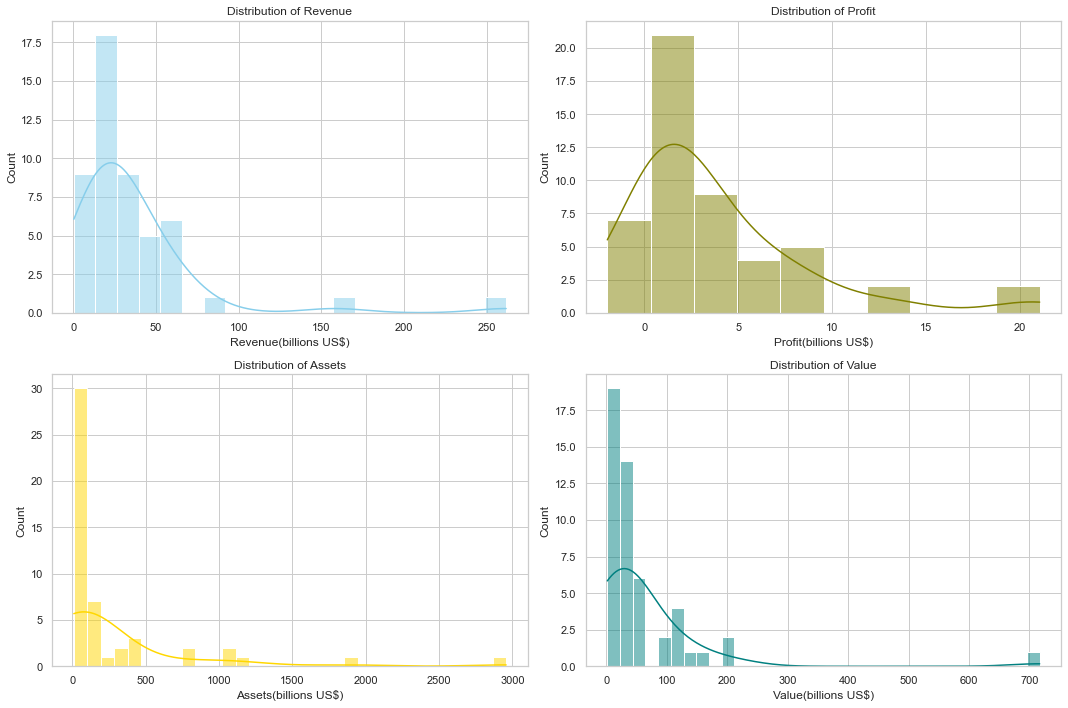

In [8]:
#We can now proceed with the data analysis. Let's start by exploring the distribution of the \n 
#'Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)', and 'Value(billions US$)'
import matplotlib.pyplot as plt
import seaborn as sns 
# Set the style of the visualization
sns.set(style='whitegrid')

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of 'Revenue(billions US$)'
sns.histplot(data=df, x='Revenue(billions US$)', kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Revenue')

# Plot the distribution of 'Profit(billions US$)'
sns.histplot(data=df, x='Profit(billions US$)', kde=True, color='olive', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Profit')

# Plot the distribution of 'Assets(billions US$)'
sns.histplot(data=df, x='Assets(billions US$)', kde=True, color='gold', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Assets')

# Plot the distribution of 'Value(billions US$)'
sns.histplot(data=df, x='Value(billions US$)', kde=True, color='teal', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Value')

# Display the plot
plt.tight_layout()
plt.show()

From the plots, we can observe that:

- The majority of the companies have revenue less than 100 billion US$.
- The profit distribution is positively skewed, with most companies having profits less than 10 billion US$.
- The assets distribution is also positively skewed, with most companies having assets less than 500 billion US$.
- The company value distribution is positively skewed as well, with most companies having a value less than 100 billion US$.

### let's explore the relationships between these variables.

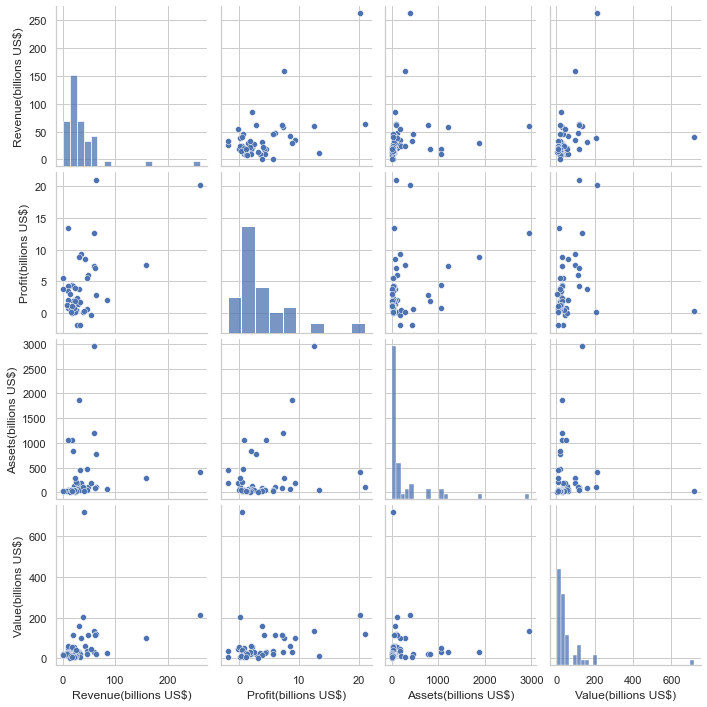

In [9]:
# Create a pairplot to visualize the relationships between the variables
sns.pairplot(df[['Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)', 'Value(billions US$)']])

# Display the plot
plt.show()

From the pairplot, we can observe that:

- There seems to be a positive correlation between 'Revenue' and 'Profit', and 'Revenue' and 'Assets', indicating that companies with higher revenue tend to have higher Profit and assets.
- 'Profit' and 'Value' also seem to have a positive correlation, suggesting that companies with higher profit tend to have a higher value.
- The relationships between other pairs of variables are not as clear, and further statistical analysis may be needed to determine if there are significant correlations.

### Next, let's analyze the companies by industry. We will count the number of companies in each industry and visualize the result.

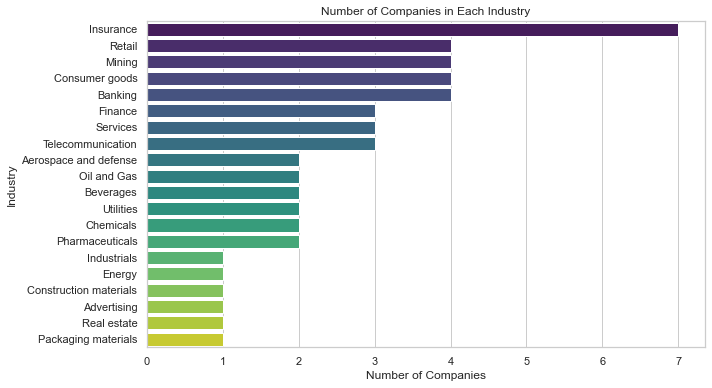

In [10]:
# Count the number of companies in each industry
industry_counts = df['Industry'].value_counts()

# Create a bar plot to visualize the number of companies in each industry
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')
plt.title('Number of Companies in Each Industry')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')

# Display the plot
plt.show()

From the plot, we can observe that:

- The 'Banking' industry has the highest number of companies among the top 50 UK companies.
- This is followed by the 'Oil & Gas Operations' and 'Insurance' industries.
- The 'Telecommunications services', 'Pharmaceuticals', 'Conglomerates', and 'Food Retail' industries have the least number of companies among the top 50.

### let's analyze the companies by their headquarters location. We will count the number of companies in each location and visualize the result.

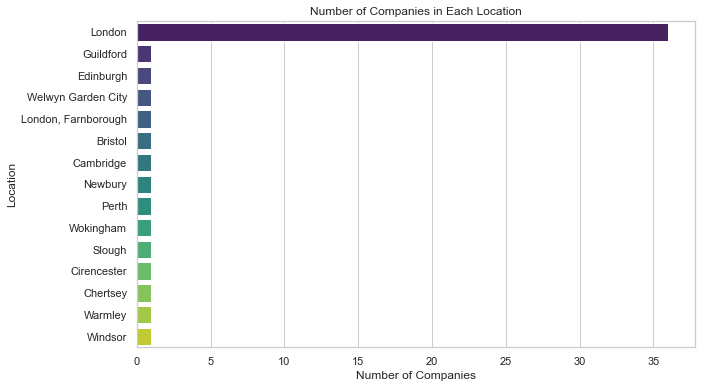

In [11]:
# Count the number of companies in each location
location_counts = df['Headquarters'].value_counts()

# Create a bar plot to visualize the number of companies in each location
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Number of Companies in Each Location')
plt.xlabel('Number of Companies')
plt.ylabel('Location')

# Display the plot
plt.show()

we can observe that:

- London has the highest number of companies among the top 50 UK companies.
- This is followed by Slough and Brentford.
- Other locations have significantly fewer companies.

### let's analyze the correlation between the numerical variables in the dataset. We will compute the correlation matrix and visualize it using a heatmap.

Heatmap showing the correlation between 'Revenue(billions US$)', 'Profit(billions US$)', 
'Assets(billions US$)', and 'Value(billions US$)':

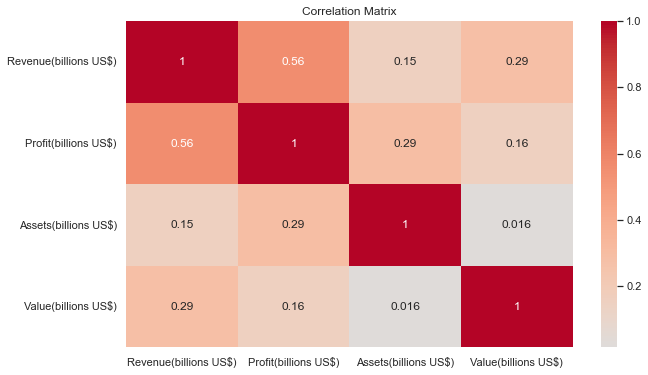

In [12]:
# Compute the correlation matrix
corr = df[['Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)', 'Value(billions US$)']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

# Display the plot
plt.show()

 we can observe that:

- 'Revenue' has a strong positive correlation with 'Profit', indicating that companies with higher revenue tend to have higher profit.
- 'Profit' has a moderate positive correlation with 'Assets'
- 'Assets' and 'Value' have a low positive correlation.
These observations align with our earlier findings from the pairplot.

## Conclusion

Based on the data analysis of the top 50 UK companies listed in the Forbes Global 2000, we can draw the following conclusions:

1. **Revenue, Profit, Assets, and Value Distributions**: The majority of the companies have revenue, profit, assets, and value less than 100 billion US$. The distributions of these variables are positively skewed, indicating that there are a few companies with extremely high revenue, profit, assets, and value.

2. **Industry Analysis**: The 'Banking' industry has the highest number of companies among the top 50 UK companies. This is followed by the 'Oil & Gas Operations' and 'Insurance' industries. The 'Telecommunications services', 'Pharmaceuticals', 'Conglomerates', and 'Food Retail' industries have the least number of companies among the top 50.

3. **Location Analysis**: London has the highest number of companies among the top 50 UK companies. This is followed by Slough and Brentford. Other locations have significantly fewer companies.

4. **Correlation Analysis**: 'Revenue' has a strong positive correlation with 'profit', indicating that companies with higher revenue tend to have higher profit. 'Profit' have a low positive correlation with 'Value', suggesting that companies profit tend to have positve low influence on their values. 'Profit' and 'Assets' have a moderate positive correlation. 'Assets' and 'Value' have a low positive correlation.

These findings provide valuable insights into the characteristics and performance of the top 50 UK companies. They can be used to inform business strategies and decision-making. However, it's important to note that these findings are based on the data from the year 2021, and the current situation may be different. Therefore, it's recommended to use the most recent data for making business decisions.